# EDA

## Installing packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import kaggle
import jinja2
from bs4 import BeautifulSoup
import requests
import csv
import re



## Setting Up Environment

In [3]:
plt.style.use('ggplot')
colors_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Importing Data and parsing tweet text

In [4]:
df = pd.read_csv('assets/tweets.csv')

In [5]:
def process_data(df):
    df['tweet_datetime'] = pd.to_datetime(df['tweet_date'])
    df['tweet_date'] = df['tweet_datetime'].dt.date
    df['wordle_id'] = df['tweet_text'].str[:10]
    df['n_attempts'] = df['tweet_text'].str[11].astype(int)
    df['id'] = df['tweet_text'].str[7:10].astype(int)
    return df

df = process_data(df)
df.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210


## How many tweets for each date

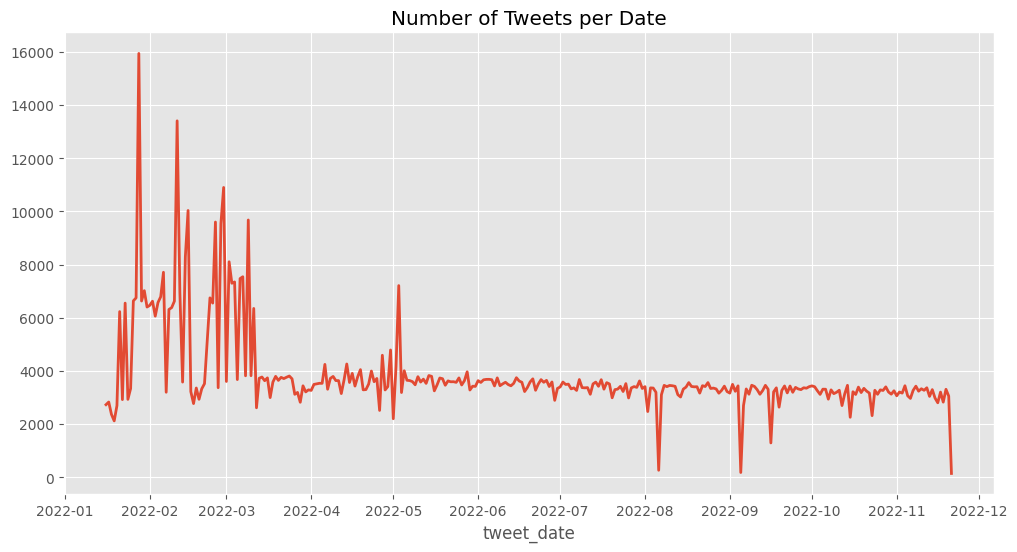

In [6]:
df['tweet_date'].value_counts().sort_index()\
    .plot(figsize=(12,6),color = colors_pal[0],title = 'Number of Tweets per Date', lw = 2)

plt.show()

## Number of attempts analysis

In [ ]:
table = df.groupby("wordle_id")['n_attempts']\
    .value_counts()\
        .unstack()\
            .style.background_gradient(cmap='Blues',axis = 1)


## how many attempts does it usually take to win ?

<Axes: title={'center': 'Number of Attempts Solved in'}, ylabel='n_attempts'>

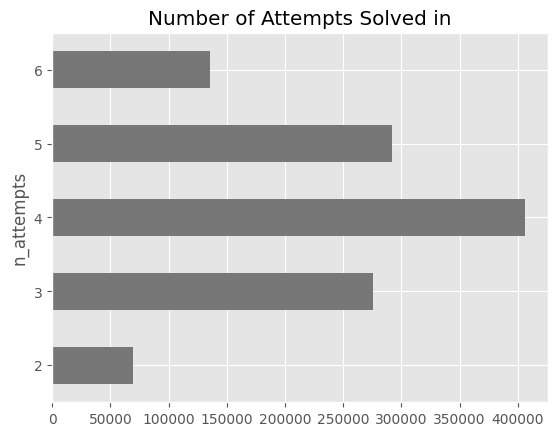

In [12]:
df['n_attempts'].value_counts()\
    .sort_index() \
        .plot(kind = 'barh',
              title = 'Number of Attempts Solved in',
              color = colors_pal[3])

## Parse Tweet Text

In [13]:
n=1
def parse_tweet_text(df):
    for n in range(6):
        n += 1

        
        df['tweet_text'] = df['tweet_text'].str.replace( '⬜','⬛')
        df[f"has_guess{n}"] = df['tweet_text'].str.split('\n').str[n+1]\
            .str.contains("|".join(['🟩','⬛','🟨']))\
            .fillna(False)

    
        df.loc[df[f'has_guess{n}'], f'guess{n}'] = \
            df['tweet_text'].str.split('\n').str[n+1].str[:5]


        df.loc[df[f'has_guess{n}'], f'guess{n}_correct'] = \
            df[f'guess{n}'].str.count('🟩')
        df.loc[df[f'has_guess{n}'], f'guess{n}_misplaced'] = \
            df[f'guess{n}'].str.count('🟨')
        df.loc[df[f'has_guess{n}'], f'guess{n}_incorrect'] = \
            df[f'guess{n}'].str.count('⬛')

        df.loc[df[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return df

tweets = parse_tweet_text(df)

C:\Users\egrac\AppData\Local\Temp\ipykernel_13208\728985737.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\egrac\AppData\Local\Temp\ipykernel_13208\728985737.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\egrac\AppData\Local\Temp\ipykernel_13208\728985737.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [14]:

df['tweet_text'].str.split("\n").str.contains('🟩')
# Kepping additional text

df['additional_text'] = \
    df.loc[~df['tweet_text'] \
        .str.split("\n").str[-1].str.contains('🟩')]\
            ['tweet_text'].str.split("\n").str[-1]

df[df['additional_text'].notnull()]['additional_text'].head()

8                                         Got lucky lol
12    Oh boy….I just played for the first time. I ca...
25                                      어 이건 좀 자랑하고 싶다…
28                             sheeeeeeeeeeeeeeeeeeeesh
30                                                    😤
Name: additional_text, dtype: object

## Plot Results by Attempt

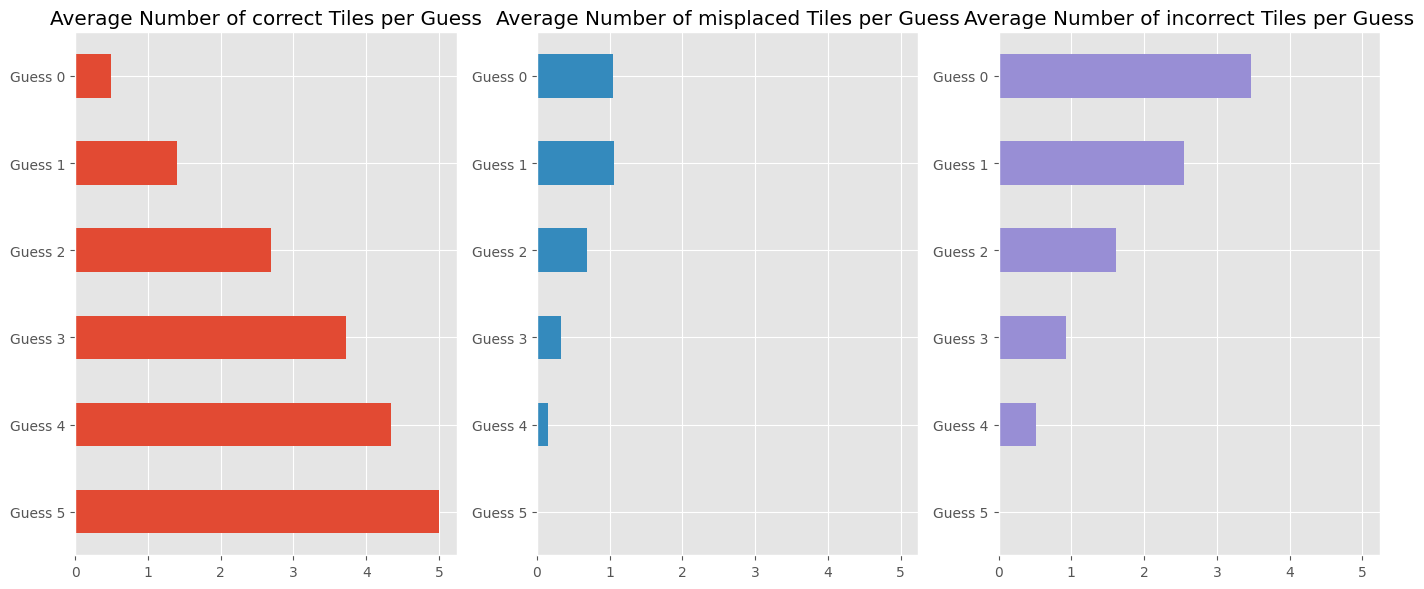

In [15]:
fig, axs = plt.subplots(1,3, figsize=(14,6),sharex = True)
for  i, x in enumerate(['_correct','_misplaced','_incorrect']):
    col_subset = [c for c in df.columns if x in c]
    guess_avg = df[col_subset].mean()
    guess_avg.index = [f'Guess {i}' for i in range(6)]
    guess_avg.sort_index(ascending = False)\
    .plot(kind = 'barh',
          ax = axs[i],
          color = colors_pal[i],
          title = f'Average Number of {x[1:]} Tiles per Guess',
          lw = 2)   
plt.tight_layout()
plt.show()

In [16]:
df['id'] = df['id'].astype(int)

In [17]:
answers = pd.read_csv('assets/wordle_answers.csv')
answers = answers[answers['Number'].str.isdigit()]
answers = answers[~answers["Word"].str.isdigit()]


okay so this data contains wordle ids, so it is very, very helpful

In [18]:

answers["id"] = answers['Number'].astype(int)
answers["answer"] = answers['Word']
answers.drop(columns=['Number', 'Word'], inplace=True)
answers['id'] = answers['id'].astype(int)


In [19]:
merged_df = pd.merge(df, answers, on='id', how='left')

In [20]:
first_guess_correct = []
for i, d in merged_df.dropna(subset=['answer']).iterrows():
    example_text = d['guess1']
    example_solution = d['answer']
    results  = [x.span()[0] for x in re.finditer('🟩', example_text)]
    first_guess_letter = [example_solution[i] for i in results]
    first_guess_correct += first_guess_letter

<Axes: >

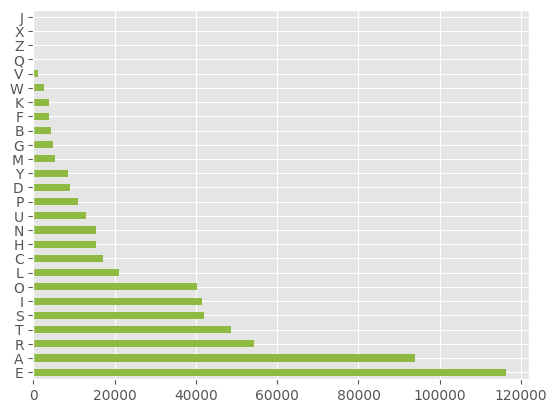

In [21]:
pd.Series(first_guess_correct).value_counts()\
    .plot(kind = "barh",
          color = colors_pal[5])

most wins start from letter E